In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import random


# Load data
url = "https://raw.githubusercontent.com/desstaw/PrivacyPreservingTechniques/main/datasets/diabetes_70k.csv"
df = pd.read_csv(url)

import warnings
warnings.simplefilter('ignore')

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'readmitted',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'service_utilization', 'numchange', 'level1_diag1', 'nummed'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74647 entries, 0 to 74646
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      74647 non-null  object 
 1   gender                    74647 non-null  object 
 2   age                       74647 non-null  object 
 3   admission_type_id         74647 non-null  int64  
 4   readmitted                74647 non-null  int64  
 5   discharge_disposition_id  74647 non-null  int64  
 6   admission_source_id       74647 non-null  int64  
 7   time_in_hospital          74647 non-null  int64  
 8   num_lab_procedures        74647 non-null  int64  
 9   num_procedures            74647 non-null  int64  
 10  num_medications           74647 non-null  int64  
 11  number_outpatient         74647 non-null  int64  
 12  number_emergency          74647 non-null  int64  
 13  number_inpatient          74647 non-null  int64  
 14  number

In [ ]:
df['level1_diag1'] = df['level1_diag1'].astype(str)

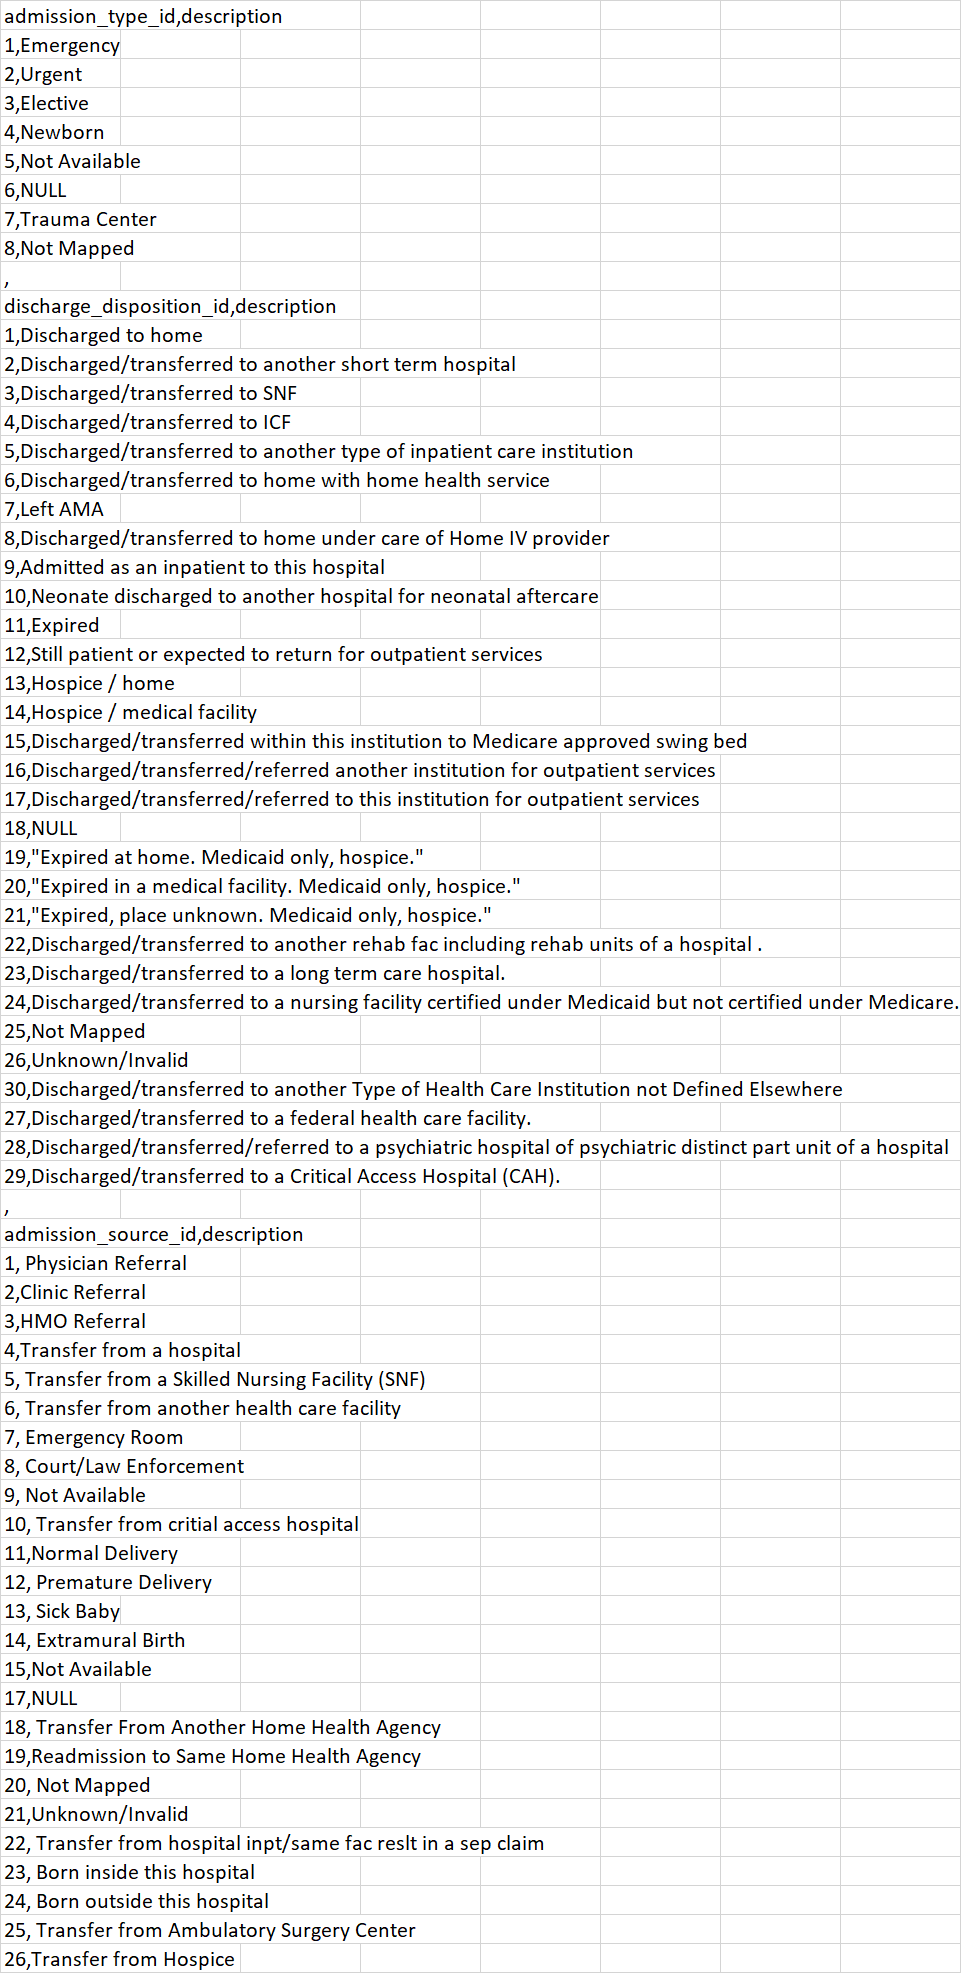

In [ ]:
columns_to_analyze = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'service_utilization', 'numchange',]

for column in columns_to_analyze:
    unique_classes_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(unique_classes_counts)
    print("\n")

Column: time_in_hospital
2     12964
3     12959
1     10669
4      9666
5      7229
6      5653
7      4647
8      3333
9      2174
10     1718
11     1229
12     1115
13      812
14      479
Name: time_in_hospital, dtype: int64


Column: num_lab_procedures
1      2332
43     2067
44     1880
45     1656
40     1618
       ... 
130       1
114       1
115       1
120       1
118       1
Name: num_lab_procedures, Length: 119, dtype: int64


Column: num_procedures
0    35356
1    14736
2     9175
3     6684
4     3103
6     3021
5     2572
Name: num_procedures, dtype: int64


Column: num_medications
12    4675
13    4447
15    4325
11    4253
10    3971
      ... 
79       1
76       1
78       1
74       1
81       1
Name: num_medications, Length: 80, dtype: int64


Column: number_outpatient
0     66560
1      4203
2      1746
3       992
4       515
5       250
6       115
8        64
7        63
9        30
10       21
12       17
11       13
13       13
14       13
15        8
17   

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'readmitted',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'service_utilization', 'numchange', 'level1_diag1', 'nummed'],
      dtype='object')

In [ ]:
columns_to_analyze = ['race', 'age', 'admission_type_id', 'admission_source_id', 'time_in_hospital', 'num_medications', 'number_emergency', 'level1_diag1', 'nummed']

for column in columns_to_analyze:
    unique_classes_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(unique_classes_counts)
    print("\n")

Column: race
Caucasian          63160
AfricanAmerican     9576
Hispanic             886
Other                732
Asian                293
Name: race, dtype: int64


Column: age
[70-80)     23495
[60-70)     17268
[80-90)     13204
[50-60)     10761
[40-50)      5499
[30-40)      1867
[90-100)     1378
[20-30)       776
[10-20)       323
[0-10)         76
Name: age, dtype: int64


Column: admission_type_id
1    44457
3    13043
2    10744
6     3412
5     2792
8      183
7       10
4        6
Name: admission_type_id, dtype: int64


Column: admission_source_id
7     45788
1     20912
17     4100
4      1730
6      1039
2       549
5       314
3        87
20       87
9        22
8         6
10        4
22        4
14        2
11        1
13        1
25        1
Name: admission_source_id, dtype: int64


Column: time_in_hospital
2     12964
3     12959
1     10669
4      9666
5      7229
6      5653
7      4647
8      3333
9      2174
10     1718
11     1229
12     1115
13      812
14      

In [ ]:
!pip install catboost

## Race Generalization

In [ ]:
race_mapping = {
    'L1_race': {
        "Caucasian": ["Caucasian"],
        "AfricanAmerican": ["Other"],
        "Hispanic": ["Other"],
        "Asian": ["Other"],
        "Other": ["Other"],
    },
    'L2_race': {
        "Caucasian": ["Caucasian"],
        "AfricanAmerican": ["AfricanAmerican"],
        "Hispanic": ["Other"],
        "Asian": ["Other"],
        "Other": ["Other"]
    },
    'L3_race': {
        "Caucasian": ["Caucasian"],
        "AfricanAmerican": ["AfricanAmerican"],
        "Hispanic": ["Hispanic"],
        "Asian": ["Other"],
        "Other": ["Other"]
    }
}


for col, mapping in race_mapping.items():
    df[col] = df['race'].map({key: ' '.join(value) for key, value in mapping.items()})
df = df.rename(columns={'race': 'L4_race'})

## Time in hospital

In [ ]:
# Define conditions for each level
conditions_level1 = [
    (df['time_in_hospital'] >= 1) & (df['time_in_hospital'] < 11),
    (df['time_in_hospital'] >= 11) & (df['time_in_hospital'] < 15)
]

# Define labels for each cluster in Level3_timehospital
labels_level1 = ['[1, 11)', '[11, 14)']

# Create the new attribute Level3_timehospital with cluster labels
df['L1_time_in_hospital'] = pd.cut(df['time_in_hospital'], bins=[1, 11, 15], labels=labels_level1, right=False)

#----------------------------------------#


# Define conditions for each level
conditions_level1 = [
    (df['time_in_hospital'] >= 1) & (df['time_in_hospital'] < 8),
    (df['time_in_hospital'] >= 8) & (df['time_in_hospital'] < 15)
]

# Define labels for each cluster in Level3_timehospital
labels_level2 = ['[1, 8)', '[8, 15)']

# Create the new attribute Level3_timehospital with cluster labels
df['L2_time_in_hospital'] = pd.cut(df['time_in_hospital'], bins=[1, 8, 15], labels=labels_level2, right=False)


#----------------------------------------#
# Define conditions for each level
conditions_level1 = [
    (df['time_in_hospital'] >= 1) & (df['time_in_hospital'] < 3),
    (df['time_in_hospital'] >= 3) & (df['time_in_hospital'] < 8),
    (df['time_in_hospital'] >= 8) & (df['time_in_hospital'] < 11),
    (df['time_in_hospital'] >= 11) & (df['time_in_hospital'] < 15)
]

# Define labels for each cluster in Level3_timehospital
labels_level3 = ['[1, 3)', '[3, 8)', '[8, 11)', '[11, 15)']

# Create the new attribute Level3_timehospital with cluster labels
df['L3_time_in_hospital'] = pd.cut(df['time_in_hospital'], bins=[1, 3, 8, 11, 15], labels=labels_level3, right=False)
df = df.rename(columns={'time_in_hospital': 'L4_time_in_hospital'})

## Age

In [ ]:
# Extract the lower bound of each interval using regular expressions
df['lower_bound'] = df['age'].str.extract('(\d+)-', expand=False).astype(float)

# Define the original intervals
original_intervals = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Merge adjacent intervals and define labels for the new intervals
merged_intervals = [(0, 50), (50, 100)]
labels_merged = ['50 >', '50 =<']

# Create a new column with merged intervals
df['L1_age'] = pd.cut(df['lower_bound'], bins=[interval[0] for interval in merged_intervals] + [merged_intervals[-1][1]], labels=labels_merged, right=False)

# Display the resulting DataFrame
print(df[['age', 'L1_age']])

           age L1_age
0      [80-90)  50 =<
1      [80-90)  50 =<
2      [80-90)  50 =<
3      [80-90)  50 =<
4      [70-80)  50 =<
...        ...    ...
74642  [80-90)  50 =<
74643  [70-80)  50 =<
74644  [80-90)  50 =<
74645  [60-70)  50 =<
74646  [80-90)  50 =<

[74647 rows x 2 columns]


In [ ]:
# Extract the lower bound of each interval using regular expressions
df['lower_bound'] = df['age'].str.extract('(\d+)-', expand=False).astype(float)

# Define the original intervals
original_intervals = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Merge adjacent intervals and define labels for the new intervals
merged_intervals = [(0, 30), (30, 50), (50, 70), (70, 100)]
labels_merged = ['[0-30)', '[30-50)', '[50-70)', '[70-100)']

# Create a new column with merged intervals
df['L2_age'] = pd.cut(df['lower_bound'], bins=[interval[0] for interval in merged_intervals] + [merged_intervals[-1][1]], labels=labels_merged, right=False)

# Display the resulting DataFrame
print(df[['age', 'L2_age']])

           age    L2_age
0      [80-90)  [70-100)
1      [80-90)  [70-100)
2      [80-90)  [70-100)
3      [80-90)  [70-100)
4      [70-80)  [70-100)
...        ...       ...
74642  [80-90)  [70-100)
74643  [70-80)  [70-100)
74644  [80-90)  [70-100)
74645  [60-70)   [50-70)
74646  [80-90)  [70-100)

[74647 rows x 2 columns]


In [ ]:
'''
# Extract the lower bound of each interval using regular expressions
df['lower_bound'] = df['age'].str.extract('(\d+)-', expand=False).astype(float)

# Define the original intervals
original_intervals = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Merge adjacent intervals and define labels for the new intervals
merged_intervals = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100)]
labels_merged = ['[0-20)', '[20-40)', '[40-60)', '[60-80)', '[80-100)']

# Create a new column with merged intervals
df['L3_age'] = pd.cut(df['lower_bound'], bins=[interval[0] for interval in merged_intervals] + [merged_intervals[-1][1]], labels=labels_merged, right=False)

# Display the resulting DataFrame
print(df[['age', 'L3_age']])
'''

           age    L3_age
0      [80-90)  [80-100)
1      [80-90)  [80-100)
2      [80-90)  [80-100)
3      [80-90)  [80-100)
4      [70-80)   [60-80)
...        ...       ...
74642  [80-90)  [80-100)
74643  [70-80)   [60-80)
74644  [80-90)  [80-100)
74645  [60-70)   [60-80)
74646  [80-90)  [80-100)

[74647 rows x 2 columns]


In [ ]:
df = df.rename(columns={'age': 'L3_age'})

##Emergency admission number

In [ ]:
print(df[['number_emergency']])

       number_emergency
0                     0
1                     0
2                     0
3                     1
4                     0
...                 ...
74642                 0
74643                 0
74644                 1
74645                 0
74646                 0

[74647 rows x 1 columns]


In [ ]:
# Define conditions for each level
conditions_level1 = [
    (df['number_emergency'] <= 10),
    (df['number_emergency'] > 10)
]

# Define labels for each cluster in Level3_timehospital
labels_level1 = ['<= 10', '> 10']

# Create the new attribute Level3_timehospital with cluster labels
df['L1_number_emergency'] = pd.cut(df['number_emergency'], bins=[-float('inf'), 10, float('inf')], labels=labels_level1, right=False)

#----------------------------------------#
# Define conditions for each level
conditions_level2 = [
    (df['number_emergency'] <= 5),
    (df['number_emergency'] > 5)
]

# Define labels for each cluster in Level3_timehospital
labels_level2 = ['<= 5', '> 5']

# Create the new attribute Level3_timehospital with cluster labels
df['L2_number_emergency'] = pd.cut(df['number_emergency'], bins=[-float('inf'), 5, float('inf')], labels=labels_level2, right=False)
#----------------------------------------#


# Define conditions for each level
conditions_level3 = [
    (df['number_emergency'] >= 0) & (df['number_emergency'] < 3),
    (df['number_emergency'] >= 3) & (df['number_emergency'] < 7),
    (df['number_emergency'] >= 7) & (df['number_emergency'] < 11),
    (df['number_emergency'] >= 11) & (df['number_emergency'] < 43),
]

# Define labels for each cluster in Level3_timehospital
labels_level3 = ['[0-2]', '[3-6]', '[7-10]', '> 10']

# Create the new attribute Level3_timehospital with cluster labels
df['L3_number_emergency'] = pd.cut(df['number_emergency'], bins=[-float('inf'), 3, 7, 11, 43], labels=labels_level3, right=False)


df = df.rename(columns={'number_emergency': 'L4_number_emergency'})

print(df[['L4_number_emergency']])

       L4_number_emergency
0                        0
1                        0
2                        0
3                        1
4                        0
...                    ...
74642                    0
74643                    0
74644                    1
74645                    0
74646                    0

[74647 rows x 1 columns]


## Diagnosis

In [ ]:
df = df.rename(columns={'level1_diag1': 'diagnosis'})
df['diagnosis'] = df['diagnosis'].astype(str)

# Rename the categories (if it's a categorical column)
# Replace 'old_category' and 'new_category' with your actual category names
df['diagnosis'] = df['diagnosis'].astype('category').cat.rename_categories({'0.0': 'Other', '1.0': 'Circulatory', '2.0': 'Respiratory', '3.0': 'Digestive', '4.0': 'Diabetes', '5.0': 'Injury', '6.0': 'Muscoskeletal',
                                                                            '8.0': 'Neoplasms', '9.0': 'Endocrine, Nutritional, Metabolic and Immunity', '10.0': 'Skin & subcutaneous tissue', '11.0': 'Infections',
                                                                             '12.0': 'Mental disorder'})


In [ ]:
print(df[['diagnosis']])

         diagnosis
0      Circulatory
1      Circulatory
2            Other
3            Other
4         Diabetes
...            ...
74642  Respiratory
74643  Circulatory
74644  Circulatory
74645  Circulatory
74646  Respiratory

[74647 rows x 1 columns]


In [ ]:
diagnosis_mapping = {
    'L1_diagnosis': {
        "Other": ["Non-systematic disease"],
        "Circulatory": ["Systematic disease"],
        "Respiratory": ["Systematic disease"],
        "Digestive": ["Non-systematic disease"],
        "Diabetes": ["Non-systematic disease"],
        "Injury": ["Non-systematic diseasey"],
        "Muscoskeletal": ["Systematic disease"],
        "Neoplasms": ["Non-systematic disease"],
        "Endocrine, Nutritional, Metabolic and Immunity": ["Non-systematic disease"],
        "Skin & subcutaneous tissue": ["Non-systematic disease"],
        "Infections": ["Non-systematic disease"],
        "Mental disorder": ["Non-systematic disease"]
    },
    'L2_diagnosis': {
        "Other": ["Other"],
        "Circulatory": ["Circulatory/Respiratory"],
        "Respiratory": ["Circulatory/Respiratory"],
        "Digestive": ["Digestive/Infection"],
        "Diabetes": ["Metabolic/Endocrine"],
        "Injury": ["Muscoskeletal/Injury"],
        "Muscoskeletal": ["Muscoskeletal/Injury"],
        "Neoplasms": ["Neoplasms/Skin"],
        "Endocrine, Nutritional, Metabolic and Immunity": ["Metabolic/Endocrine"],
        "Skin & subcutaneous tissue": ["Neoplasms/Skin"],
        "Infections": ["Digestive/Infection"],
        "Mental disorder": ["Mental disorder"]
    }
}


for col, mapping in diagnosis_mapping.items():
    df[col] = df['diagnosis'].map({key: ' '.join(value) for key, value in mapping.items()})
df = df.rename(columns={'diagnosis': 'L3_diagnosis'})

In [ ]:
print(df[['L1_diagnosis']])

                 L1_diagnosis
0          Systematic disease
1          Systematic disease
2      Non-systematic disease
3      Non-systematic disease
4      Non-systematic disease
...                       ...
74642      Systematic disease
74643      Systematic disease
74644      Systematic disease
74645      Systematic disease
74646      Systematic disease

[74647 rows x 1 columns]


In [ ]:
df.columns

Index(['L4_race', 'gender', 'L4_age', 'admission_type_id', 'readmitted',
       'discharge_disposition_id', 'admission_source_id',
       'L4_time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'L4_number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'service_utilization', 'numchange', 'L3_diagnosis',
       'nummed', 'L1_race', 'L2_race', 'L3_race', 'L1_time_in_hospital',
       'L2_time_in_hospital', 'L3_time_in_hospital', 'lower_bound', 'L1_age',
       'L2_age', 'L3_age', 'L1_number_emergency', 'L2_number_emergency',
       'L3_number_emergency', 'L1_diagnosis', 'L2_diagnosis'],
      dtype='object')

## Admission type

In [ ]:

# Sample DataFrame


# Define the mapping for category renaming
category_mapping = {'1': 'Emergency',
    '2': 'Urgent',
    '3': 'Elective',
    '4': 'Newborn',
    '5': 'Not available',
    '6': 'NULL',
    '7': 'Trauma center',
    '8': 'Not mapped'}

# Convert the 'CategoryColumn' to a categorical type with the original categories
df['admission_type_id'] = pd.Categorical(df['admission_type_id'])

# Rename the categories using the mapping
df['admission_type_id'] = df['admission_type_id'].cat.rename_categories(category_mapping)

In [ ]:
df['admission_type_id'] = df['admission_type_id'].astype(str)

# Rename the categories (if it's a categorical column)
# Replace 'old_category' and 'new_category' with your actual category names
df['admission_type_id'] = df['admission_type_id'].astype('category').cat.rename_categories({'1': 'Emergency',
    '2': 'Urgent',
    '3': 'Elective',
    '4': 'Newborn',
    '5': 'Not available',
    '6': 'NULL',
    '7': 'Trauma center',
    '8': 'Not mapped'})


In [ ]:
# Define the admission_type_id mapping for different levels
admission_type_id_mapping_levels = {
    'L1_admission_type_id': {
        "Emergency": ["Urgent"],
        "Urgent": ["Urgent"],
        "Elective": ["Elective"],
        "Newborn": ["Other"],
        "Not available": ["Not available"],
        "NULL": ["Not available"],
        "Trauma center": ["Other"],
        "Not mapped": ["Not available"]
    },
    'L2_admission_type_id': {
        "Emergency": ["Urgent"],
        "Urgent": ["Urgent"],
        "Elective": ["Elective"],
        "Newborn": ["Other"],
        "Not available": ["Other"],
        "NULL": ["Other"],
        "Trauma center": ["Other"],
        "Not mapped": ["Other"]
    }
}

# Apply the admission_type_id mapping for different levels
for col, mapping in admission_type_id_mapping_levels.items():
    df[col] = df['admission_type_id'].map({key: ' '.join(value) for key, value in mapping.items()})

# Rename the column
df = df.rename(columns={'admission_type_id': 'L3_admission_type_id'})


In [ ]:
print(df[['L3_admission_type_id', 'L2_admission_type_id']])

      L3_admission_type_id L2_admission_type_id
0                 Elective             Elective
1                Emergency               Urgent
2                 Elective             Elective
3            Not available                Other
4                 Elective             Elective
...                    ...                  ...
74642            Emergency               Urgent
74643             Elective             Elective
74644             Elective             Elective
74645            Emergency               Urgent
74646        Not available                Other

[74647 rows x 2 columns]


In [ ]:
df.columns

Index(['L4_race', 'gender', 'L4_age', 'L3_admission_type_id', 'readmitted',
       'discharge_disposition_id', 'admission_source_id',
       'L4_time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'L4_number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'service_utilization', 'numchange', 'L3_diagnosis',
       'nummed', 'L1_race', 'L2_race', 'L3_race', 'L1_time_in_hospital',
       'L2_time_in_hospital', 'L3_time_in_hospital', 'lower_bound', 'L1_age',
       'L2_age', 'L3_age', 'L1_number_emergency', 'L2_number_emergency',
       'L3_number_emergency', 'L1_diagnosis', 'L2_diagnosis',
       'L1_admission_type_id', 'L2_admission_type_id'],
      dtype='object')

## Number of procedures

In [ ]:
# Define conditions for each level
conditions_level1 = [
    (df['num_procedures'] <= 1),
    (df['num_procedures'] > 1)
]

# Define labels for each cluster in Level3_timehospital
labels_level1 = ['[0-1]', '[2-6]']

# Create the new attribute Level3_timehospital with cluster labels
df['L1_num_procedures'] = pd.cut(df['num_procedures'], bins=[-float('inf'), 1, float('inf')], labels=labels_level1, right=False)

#----------------------------------------#
# Define conditions for each level
conditions_level2 = [
    (df['num_procedures'] <= 3),
    (df['num_procedures'] > 3)
]

# Define labels for each cluster in Level3_timehospital
labels_level2 = ['[0-3]', '[4-6]']

# Create the new attribute Level3_timehospital with cluster labels
df['L2_num_procedures'] = pd.cut(df['num_procedures'], bins=[-float('inf'), 3, float('inf')], labels=labels_level2, right=False)
#----------------------------------------#


# Define conditions for each level
conditions_level3 = [
    (df['num_procedures'] >= 0) & (df['num_procedures'] < 3),
    (df['num_procedures'] >= 3) & (df['num_procedures'] < 5),
    (df['num_procedures'] >= 5) & (df['num_procedures'] < 7)
]

# Define labels for each cluster in Level3_timehospital
labels_level3 = ['[0-2]', '[3-4]', '[5-6]']

# Create the new attribute Level3_timehospital with cluster labels
df['L3_num_procedures'] = pd.cut(df['num_procedures'], bins=[-float('inf'), 3, 5, 7], labels=labels_level3, right=False)


df = df.rename(columns={'num_procedures': 'L4_num_procedures'})

print(df[['L4_num_procedures']])

       L4_num_procedures
0                      0
1                      0
2                      0
3                      0
4                      2
...                  ...
74642                  0
74643                  1
74644                  5
74645                  2
74646                  0

[74647 rows x 1 columns]


In [ ]:
df.columns

Index(['L4_race', 'gender', 'L4_age', 'L3_admission_type_id', 'readmitted',
       'discharge_disposition_id', 'admission_source_id',
       'L4_time_in_hospital', 'num_lab_procedures', 'L4_num_procedures',
       'num_medications', 'number_outpatient', 'L4_number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'service_utilization', 'numchange', 'L3_diagnosis',
       'nummed', 'L1_race', 'L2_race', 'L3_race', 'L1_time_in_hospital',
       'L2_time_in_hospital', 'L3_time_in_hospital', 'lower_bound', 'L1_age',
       'L2_age', 'L3_age', 'L1_number_emergency', 'L2_number_emergency',
       'L3_number_emergency', 'L1_diagnosis', 'L2_diagnosis',
       'L1_admission_type_id', 'L2_admission_type_id', 'L1_num_procedures',
       'L2_num_procedures', 'L3_num_procedures'],
      dt

## Number of medications

In [ ]:
# Count values above 20
count_above_20 = (df['num_medications'] < 5).sum()

# Display the count
print(f"Number of values above 20: {count_above_20}")

Number of values above 20: 2172


In [ ]:
# Define conditions for each level
conditions_level1 = [
    (df['num_medications'] >= 0) & (df['num_medications'] < 11),
    (df['num_medications'] >= 11) & (df['num_medications'] < 21),
    (df['num_medications'] >= 21) & (df['num_medications'] < 31),
    (df['num_medications'] >= 31)
]

# Define labels for each cluster in Level3_timehospital
labels_level1 = ['[0-10]', '[11-20]', '[21-30]', '>30']

# Create the new attribute Level3_timehospital with cluster labels
df['L1_num_medications'] = pd.cut(df['num_medications'], bins=[-float('inf'), 11, 21, 31, float('inf')], labels=labels_level1, right=False)

#----------------------------------------#
# Define conditions for each level
conditions_level2 = [
    (df['num_medications'] >= 0) & (df['num_medications'] < 6),
    (df['num_medications'] >= 6) & (df['num_medications'] < 11),
    (df['num_medications'] >= 11) & (df['num_medications'] < 16),
    (df['num_medications'] >= 16) & (df['num_medications'] < 21),
    (df['num_medications'] >= 21) & (df['num_medications'] < 31),
    (df['num_medications'] >= 31)
]

# Define labels for each cluster in Level3_timehospital
labels_level2 = ['[0-5]', '[6-10]', '[11-15]', '[16-20]', '[21-30]', '>30']

# Create the new attribute Level3_timehospital with cluster labels
df['L2_num_medications'] = pd.cut(df['num_medications'], bins=[-float('inf'), 6, 11, 16, 21, 31, float('inf')], labels=labels_level2, right=False)
#----------------------------------------#



df = df.rename(columns={'num_medications': 'L4_num_medications'})

print(df[['L4_num_medications', 'L1_num_medications']])

       L4_num_medications L1_num_medications
0                       7             [0-10]
1                      15            [11-20]
2                      16            [11-20]
3                      10             [0-10]
4                       9             [0-10]
...                   ...                ...
74642                  19            [11-20]
74643                  15            [11-20]
74644                  11            [11-20]
74645                  15            [11-20]
74646                  26            [21-30]

[74647 rows x 2 columns]


In [ ]:
df.columns

Index(['L4_race', 'gender', 'L4_age', 'L3_admission_type_id', 'readmitted',
       'discharge_disposition_id', 'admission_source_id',
       'L4_time_in_hospital', 'num_lab_procedures', 'L4_num_procedures',
       'L4_num_medications', 'number_outpatient', 'L4_number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'service_utilization', 'numchange', 'L3_diagnosis',
       'nummed', 'L1_race', 'L2_race', 'L3_race', 'L1_time_in_hospital',
       'L2_time_in_hospital', 'L3_time_in_hospital', 'lower_bound', 'L1_age',
       'L2_age', 'L3_age', 'L1_number_emergency', 'L2_number_emergency',
       'L3_number_emergency', 'L1_diagnosis', 'L2_diagnosis',
       'L1_admission_type_id', 'L2_admission_type_id', 'L1_num_procedures',
       'L2_num_procedures', 'L3_num_procedures', 'L1_nu

In [ ]:
xxx

NameError: ignored

## Classification model

In [ ]:
# Iterate through the columns of the DataFrame
for col in df.columns:
    # Check if the column is of type category
    if df[col].dtype == 'category':
        # Convert the column to object type
        df[col] = df[col].astype('object')

# Check the dtypes of the columns
print(df.dtypes)

In [ ]:
df.columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report


feature_set = ['gender', 'discharge_disposition_id', 'num_lab_procedures', 'admission_source_id',
        'max_glu_serum', 'A1Cresult', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'service_utilization',
       'glyburide', 'pioglitazone', 'rosiglitazone',  'change', 'insulin','diabetesMed',
       'L3_diagnosis', 'L4_race', 'L4_time_in_hospital', 'L4_age', 'L4_number_emergency', 'L3_admission_type_id', 'L4_num_procedures', 'L4_num_medications']

feature_set = df[feature_set]

X = feature_set#.drop('readmitted', axis=1)
y = df['readmitted']





# Convert categorical features to strings
categorical_features_indices = feature_set.select_dtypes(include=['object']).columns
#X[categorical_features_indices] = X[categorical_features_indices].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



# Initialize the CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.1, loss_function='Logloss', eval_metric='Accuracy', cat_features=list(categorical_features_indices))

# Train the model on the training data
catboost_model.fit(X_train, y_train, cat_features=list(categorical_features_indices))  # Convert to list here

# Predict on the testing data
y_pred = catboost_model.predict(X_test)



# Evaluate the model's performance
classification_metrics = classification_report(y_test, y_pred)
print(classification_metrics)



# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", auc_roc)

In [ ]:
# Extract feature importance
feature_importance = catboost_model.get_feature_importance()

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('CatBoost Feature Importance')
plt.show()

In [ ]:
df.columns

In [ ]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['insulin'], df['readmitted'])

# Display the resulting DataFrame
print(cross_tab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes/gen_diabetes_70K.csv', index=False)

In [ ]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
L4_race,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Male,Female,Female,Female,Male,Female,Female,Female,Male,Female
L4_age,[80-90),[80-90),[80-90),[80-90),[70-80),[70-80),[70-80),[70-80),[80-90),[60-70)
L3_admission_type_id,Elective,Emergency,Elective,Not available,Elective,Urgent,Elective,NULL,Elective,NULL
readmitted,1,1,0,1,1,1,1,0,0,1
discharge_disposition_id,1,3,1,6,3,1,1,1,6,1
admission_source_id,7,7,1,17,7,1,1,17,1,7
L4_time_in_hospital,2,4,14,2,8,6,3,1,3,9
num_lab_procedures,45,71,59,13,1,72,42,29,30,49
L4_num_procedures,0,0,0,0,2,0,2,1,1,2
